<a href="https://colab.research.google.com/github/jorgeeder/diario-de-bordo/blob/main/EP0_equalizacao_histograma/equalizacao_histograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

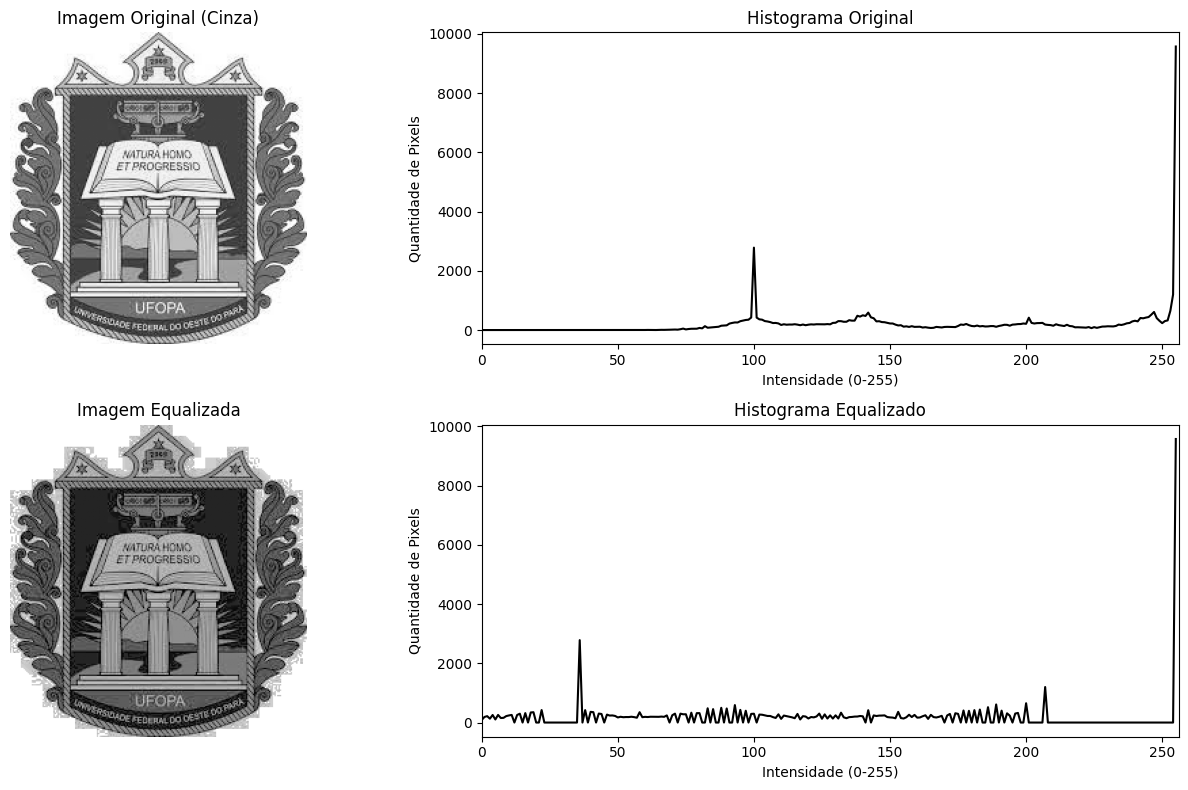

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests

# URL da imagem (pode trocar por outra)
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSd3fV3j-OTOD3aqwNom6UPLEBqr2wQbkdFiQ&s"

# Baixar imagem da internet
response = requests.get(url)
img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# Verifique se a imagem foi carregada com sucesso
if img is None:
    print("Erro ao carregar a imagem. Verifique a URL ou a conexão.")
else:
    # Converter para tons de cinza
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Equalizar histograma
    equalized = cv2.equalizeHist(gray)

    # Calcular histogramas
    hist_original = cv2.calcHist([gray], [0], None, [256], [0,256])
    hist_equalized = cv2.calcHist([equalized], [0], None, [256], [0,256])

    # Mostrar imagens e histogramas
    plt.figure(figsize=(14,8))

    # Imagem original em escala de cinza
    plt.subplot(2,2,1)
    plt.imshow(gray, cmap='gray')
    plt.title("Imagem Original (Cinza)")
    plt.axis("off")

    # Histograma original
    plt.subplot(2,2,2)
    plt.plot(hist_original, color='black')
    plt.title("Histograma Original")
    plt.xlabel("Intensidade (0-255)")
    plt.ylabel("Quantidade de Pixels")
    plt.xlim([0,256])

    # Imagem equalizada
    plt.subplot(2,2,3)
    plt.imshow(equalized, cmap='gray')
    plt.title("Imagem Equalizada")
    plt.axis("off")

    # Histograma equalizado
    plt.subplot(2,2,4)
    plt.plot(hist_equalized, color='black')
    plt.title("Histograma Equalizado")
    plt.xlabel("Intensidade (0-255)")
    plt.ylabel("Quantidade de Pixels")
    plt.xlim([0,256])

    plt.tight_layout()
    plt.show()
